In [1]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
from shapely.geometry import Point

import matplotlib.pyplot as plt
import pandas as pd
import os

### Read in census tracts shapefile

For some reason geoplot wants all data in (lon,lat) epsg:4326

In [2]:
tracts = gpd.read_file('LA_CensusTracts/CENSUS_TRACTS_2000.shp')
tracts = tracts.to_crs(epsg=4326)

tracts.head()

,CT00,LABEL,Shape_STAr,Shape_STLe,geometry
0,101110,1011.10,1.228537e+07,15056.954289,POLYGON ((-118.2848995890062 34.25949605847045...
1,101120,1011.20,1.364394e+08,70339.952869,POLYGON ((-118.2979024328307 34.26686171396343...
2,101210,1012.10,7.019669e+06,12082.404482,POLYGON ((-118.2931794920106 34.25135286030142...
3,101220,1012.20,7.485860e+06,12652.916695,POLYGON ((-118.2782140247783 34.25168441027471...
4,101300,1013.00,2.784498e+07,28343.215220,"POLYGON ((-118.268048414828 34.23152567349363,..."


### Read family data

- Be sure to read 'familyid' as a string or initial zeroes will be lost!
- Only reading in some of the columns for this operation

In [3]:
data_cols = ['familyid','longitude','latitude']
eth = pd.read_csv('la_family_data.csv', sep=',', usecols=data_cols, dtype={'familyid': 'str'})

eth.head()

,familyid,latitude,longitude
0,000000064097,34.13613,-118.14349
1,000000191203,33.84097,-118.06158
2,000000281697,34.69933,-118.13906
3,000000374686,33.79798,-118.11764
4,000000440577,34.40821,-118.44098


### Lat/Lon pairs need to be converted to a Point() data type

We'll put these in a new column called `coordinates`

In [4]:
eth['coordinates'] = list(zip(eth['longitude'], eth['latitude']))
eth['coordinates'] = eth['coordinates'].apply(Point)

eth.head()

,familyid,latitude,longitude,coordinates
0,000000064097,34.13613,-118.14349,POINT (-118.14349 34.13613)
1,000000191203,33.84097,-118.06158,POINT (-118.06158 33.84097)
2,000000281697,34.69933,-118.13906,POINT (-118.13906 34.69933)
3,000000374686,33.79798,-118.11764,POINT (-118.11764 33.79798)
4,000000440577,34.40821,-118.44098,POINT (-118.44098 34.40821)


### Convert to GeoDataFrame, specifying which column contains the geometry

*Have to set the Coordinate Reference System (CRS) initialy to say it's been hand-coded lat/lon, `epsg:4326`*

In [5]:
gdf = gpd.GeoDataFrame(eth, geometry='coordinates')
gdf.crs = {'init': 'epsg:4326'}

### Create map of shapes and points

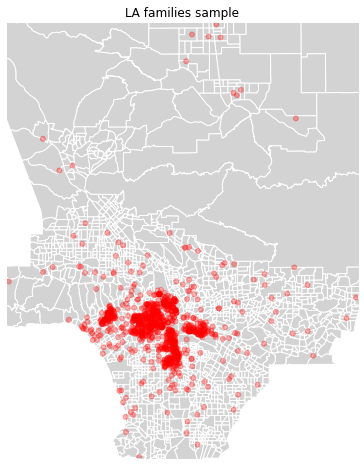

In [6]:
ax = gplt.polyplot(
    tracts,
    linewidth=1,
    projection=gcrs.AlbersEqualArea(),
    edgecolor='white',
    facecolor='lightgray',
    figsize=(8, 8)
)
gplt.pointplot(
    gdf.sample(1000),
    color='red',
    alpha=0.3,
    ax=ax
)
plt.title('LA families sample')
plt.savefig("la_family_tracts_map.png", bbox_inches='tight', pad_inches=0.1)